In [1]:
import os
os.environ['J_NOTEBOOK'] = '1'

from preprocess.preprocess import *
import PARAMETERS
PARAMETERS.DATASET = 'DRIVE'
PARAMETERS.LBP_METHOD = 'riu'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.CHANNEL = 1
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

import pandas as pd
import numpy as np

In [2]:
preprocess = Preprocess(height=608, width=576)
masks_path = f'../dataset/{PARAMETERS.DATASET}/training/mask/'
masks = sorted(os.listdir(masks_path))[:14]

n_pixels = {}
for i, mask_path in enumerate(masks):
    mask = preprocess.read_img(masks_path + mask_path)
    n_pixels[i] = np.sum(mask > 100)

n_pixels

{0: 225600,
 1: 227686,
 2: 228187,
 3: 227726,
 4: 227362,
 5: 225092,
 6: 227826,
 7: 227327,
 8: 227309,
 9: 227259,
 10: 227701,
 11: 224944,
 12: 227738,
 13: 226542}

In [3]:
pixel_ref = {}

for k, v in n_pixels.items():
    upper = np.sum(np.array(list(n_pixels.values()))[:k+1])
    pixel_ref[k] = (upper - n_pixels[k], upper)

pixel_ref

{0: (0, 225600),
 1: (225600, 453286),
 2: (453286, 681473),
 3: (681473, 909199),
 4: (909199, 1136561),
 5: (1136561, 1361653),
 6: (1361653, 1589479),
 7: (1589479, 1816806),
 8: (1816806, 2044115),
 9: (2044115, 2271374),
 10: (2271374, 2499075),
 11: (2499075, 2724019),
 12: (2724019, 2951757),
 13: (2951757, 3178299)}

In [4]:
cv_folds = {}

for i, j in enumerate(range(0, 14, 3)):
    cv_folds[i] = (pixel_ref[j][0], pixel_ref[min(j+2, 13)][1])
    
cv_folds

{0: (0, 681473),
 1: (681473, 1361653),
 2: (1361653, 2044115),
 3: (2044115, 2724019),
 4: (2724019, 3178299)}

In [5]:
from main import load_datasets_for_lbp_operator, init_clf_and_fit

parent_path = '../'
for i, lbp_operator in enumerate(['riu', 'var']):
    PARAMETERS.LBP_METHOD = lbp_operator
    PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
    if i == 0:
        df_train, df_test, y_train, y_test = load_datasets_for_lbp_operator(parent_path)
    else:
        temp_datasets = load_datasets_for_lbp_operator(parent_path, discard_columns=True)
        df_train = pd.concat([df_train, temp_datasets[0]], axis=1)
        df_test = pd.concat([df_test, temp_datasets[1]], axis=1)

In [6]:
print(df_train.columns)
display(df_train)

Index(['Original', 'riu_1:1', 'riu_1:2', 'riu_1:4', 'riu_1:8', 'riu_2:1_1',
       'riu_2:1_2', 'riu_2:1_3', 'riu_2:1_4', 'var_1:1', 'var_1:2', 'var_1:4',
       'var_1:8', 'var_2:1_1', 'var_2:1_2', 'var_2:1_3', 'var_2:1_4'],
      dtype='object')


,Original,riu_1:1,riu_1:2,riu_1:4,riu_1:8,riu_2:1_1,riu_2:1_2,riu_2:1_3,riu_2:1_4,var_1:1,var_1:2,var_1:4,var_1:8,var_2:1_1,var_2:1_2,var_2:1_3,var_2:1_4
0,0.0,35.0,8.0,8.0,8.0,35.0,35.0,8.0,8.0,307.183063,3617.609882,3036.874957,2358.925360,0.0,1.0,55.0,69.0
1,0.0,27.0,8.0,8.0,8.0,35.0,27.0,8.0,8.0,403.229576,3617.609882,3036.874957,2358.925360,3.0,4.0,86.0,102.0
2,0.0,8.0,8.0,8.0,8.0,35.0,27.0,16.0,8.0,535.282385,3745.701922,2963.570967,2358.925360,3.0,8.0,138.0,154.0
3,0.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,643.976103,3745.701922,2963.570967,2358.925360,15.0,21.0,166.0,180.0
4,0.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,8.0,702.978110,3780.810387,2963.570967,2358.925360,24.0,24.0,196.0,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,0.0,16.0,4.0,27.0,8.0,8.0,8.0,8.0,8.0,975.910396,719.381814,1114.767941,1502.198908,69.0,72.0,84.0,75.0
226538,0.0,8.0,4.0,27.0,8.0,16.0,8.0,35.0,35.0,790.251207,719.381814,1114.767941,1502.198908,81.0,72.0,69.0,66.0
226539,0.0,8.0,8.0,16.0,8.0,8.0,8.0,8.0,16.0,574.655184,714.786789,1117.547574,1502.198908,42.0,182.0,61.0,51.0
226540,0.0,16.0,8.0,16.0,8.0,8.0,8.0,16.0,8.0,381.226531,714.786789,1117.547574,1502.198908,30.0,167.0,41.0,28.0


In [7]:
from confusion_matrix_pretty_print import print_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [8]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()

def test_feature_removal(removal_col_types):
    if isinstance(removal_col_types, str):
        removal_col_types = [removal_col_types]
    remove_list = []
    for col_type in removal_col_types:
        remove_list += [c for c in df_train.columns if col_type in c]
    
    f1_list = []
    acc_list = []
    for k, v in cv_folds.items():
        PARAMETERS.MODEL_NAME = f"_cv_feat_sel_{k}"
        df_train_temp = pd.concat(
            [df_train.iloc[cv_folds[0][0]:v[0], :], df_train.iloc[v[1]:cv_folds[4][1], :]], axis=0)
        y_train_temp = pd.concat(
            [y_train.iloc[cv_folds[0][0]:v[0], :], y_train.iloc[v[1]:cv_folds[4][1], :]], axis=0)
        clf = init_clf_and_fit(
            df_train_temp.drop(columns=remove_list), y_train_temp.values.ravel(), lgb='Num', parent_path='../models')
        y_predicted = clf.predict(df_train.iloc[v[0]:v[1], :].drop(columns=remove_list))
        acc = accuracy_score(y_train.iloc[v[0]:v[1], :], y_predicted)
        acc_list.append(acc)
        f1 = f1_score(y_train.iloc[v[0]:v[1], :], y_predicted)
        f1_list.append(f1)
        '''
        mat = confusion_matrix(y_train.iloc[v[0]:v[1], :], y_predicted).ravel()
        print('Accuracy score: ' + str(acc) + '\n')
        print('F1 score: ' + str(f1) + '\n')
        print('Confusion matrix:\n')
        print_confusion_matrix(y_train.iloc[v[0]:v[1], :].values.ravel(), y_predicted.ravel())
        print(f'Sensivity: {int(mat[3]) / (int(mat[3]) + int(mat[2]))}')
        print(f'Specificity: {int(mat[0]) / (int(mat[0]) + int(mat[1]))}')
        print('-------------------------------------')
        '''

    return {'acc': np.mean(acc_list), 'f1': np.mean(f1_list)}


best_f1 = test_feature_removal([])['f1']
print('Best F1:', best_f1)

Best F1: 0.6746875027673617


Columns: Index(['Original', 'riu_1:1', 'riu_1:2', 'riu_1:4', 'riu_1:8', 'riu_2:1_1',
       'riu_2:1_2', 'riu_2:1_3', 'riu_2:1_4', 'var_1:1', 'var_1:2', 'var_1:4',
       'var_1:8', 'var_2:1_1', 'var_2:1_2', 'var_2:1_3', 'var_2:1_4'],
      dtype='object')


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


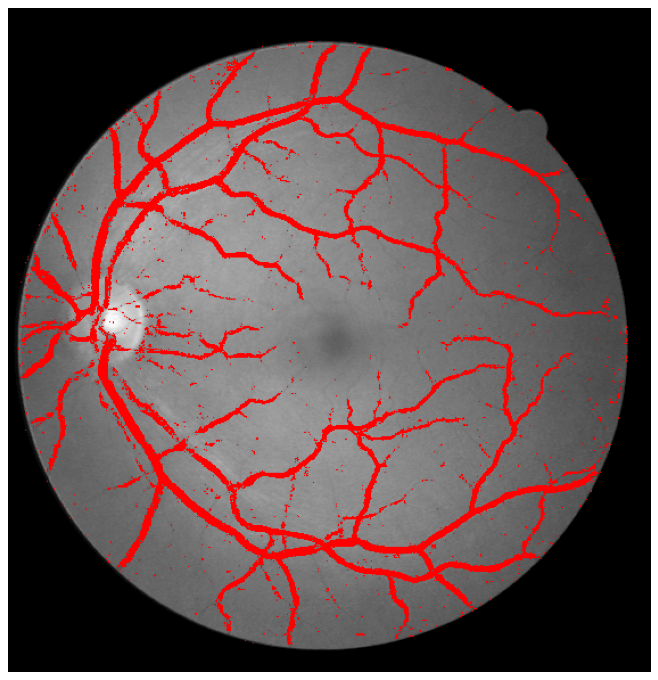

Accuracy score: 0.929758928368314

F1 score: 0.7044372394627143

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1152923 34622 
      1.0 61096 114066 
Sensivity: 0.6512028864708099
Specificity: 0.9708457363720954


(0.93, 0.704, 1152923, 34622, 61096, 114066)

In [9]:
features = {
    'x_train': df_train,
    'x_test': df_test,
    'y_train': y_train,
    'y_test': y_test
}

from main import main
PARAMETERS.PLOT = True
main(lgb='Num', features=features, plot_once=True)